<a href="https://colab.research.google.com/github/saadz-khan/StyleGAN-client/blob/master/StyleGAN2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training StyleGAN2 on Colab

Use Colab Pro+ ($49.99/month), Colab Pro ($10.00/month) to get a couple extra hours of training time in per session and do not run into low-RAM issues.

## Setting up as shown below

<center>  

![image](https://media.giphy.com/media/IFRhbMJSy3IaNZulCk/source.gif?cid=790b76116b562dd18158c804953ae06343645e756f8ed52d&rid=source.gif&ct=g)


## Sample Data Download and Testing Do not run
***No need to execute***

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/arnaud58/flickrfaceshq-dataset-ffhq")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: szk2001
Your Kaggle Key: ··········


100%|██████████| 19.5G/19.5G [03:48<00:00, 91.3MB/s]


In [ ]:
%cd /content/flickrfaceshq-dataset-ffhq
!ls -U | head -47000 | xargs rm -rf
!ls -F |grep -v / | wc -l
%cd ../

/content/flickrfaceshq-dataset-ffhq
5001
/content


In [ ]:
!zip -r data_stylegan.zip /content/flickrfaceshq-dataset-ffhq

Streaming output truncated to the last 5000 lines.
  adding: content/flickrfaceshq-dataset-ffhq/08404.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/13188.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/38275.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/43855.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/30676.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/08943.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/34730.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/18110.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/11656.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/04299.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/34136.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/35621.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/00019.png (deflated 0%)
  adding: content/flickrfaceshq-dataset-ffhq/53872.p

##Note
Convert all the ***path_to_files*** to specific paths for your own use case from the files icon on the hard left of the screen.
- Select the folder mentioned in the script
- Right Click to open options
- Select Path

##Mounting Google Drive
So I’m actually gonna install my entire repo directly into your Google Drive. This will make the setup a little easier.

First, connect your Drive to Colab. Gif explains how to:

<p align="center">
  <img src="https://media.giphy.com/media/WKMU25D95cjqWw9GCS/source.gif?cid=790b7611b611ba7d6a09693279bea7a3e08cb1e976b1b827&rid=source.gif&ct=g" alt="animated-gif2" />
</p>  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Install the repo
**Only execute this for the first time setting this up!**

If this is your first time ever running this notebook, you’ll want to install my fork of StyleGAN2 to your Drive account. Make sure you have ample space on your Drive (I’d say at least 50GB). This will install the repo and add some dependecies (like transferring from FFHQ the first time).

***After your first use of this notebook you’ll want to skip this cell and run the cell after this.***

In [2]:
# SKIP this if you already have a stylegan2 folder in your google drive
# Configuring StyleGAN so that it directly downloads all the necessary files 
%cd /content/drive/My\ Drive/
!mkdir stylegan2-colab
%cd stylegan2-colab/
!git clone https://github.com/saadz-khan/stylegan2
%cd stylegan2
!mkdir pkl
%cd pkl
# Inception v3 Download for pkl files
!gdown --id 1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF #inception: https://drive.google.com/open?id=1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF
%cd ../
!mkdir results_scratched
!mkdir results
!mkdir results/00001-pretrained
%cd results/00001-pretrained
# Below the item downloaded is 1024x1024 uncomment 
#!gdown --id 1igxv6ZP4TFGe_392B-qnSqXnglTKH5yo
# Below the item being downloades is the 512x512 ffhq based model downloaded pkl
!gdown --id 1vxO7zpBHuukvFX5AL6Er8iMgbqvTavud
!mv stylegan2-ffhq-512x512-config-f.pkl network-snapshot-10000.pkl
%cd ../../
%mkdir datasets

/content/drive/My Drive
/content/drive/My Drive/stylegan2-colab
Cloning into 'stylegan2'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 556 (delta 0), reused 0 (delta 0), pack-reused 552
Receiving objects: 100% (556/556), 22.48 MiB | 25.92 MiB/s, done.
Resolving deltas: 100% (285/285), done.
/content/drive/My Drive/stylegan2-colab/stylegan2
/content/drive/My Drive/stylegan2-colab/stylegan2/pkl
Downloading...
From: https://drive.google.com/uc?id=1JLqXE5bGZnlu2BkbLPD5_ZxoO3Nz-AvF
To: /content/drive/My Drive/stylegan2-colab/stylegan2/pkl/inception_v3_features.pkl
100% 87.3M/87.3M [00:00<00:00, 122MB/s] 
/content/drive/My Drive/stylegan2-colab/stylegan2
/content/drive/My Drive/stylegan2-colab/stylegan2/results/00001-pretrained
Downloading...
From: https://drive.google.com/uc?id=1vxO7zpBHuukvFX5AL6Er8iMgbqvTavud
To: /content/drive/My Drive/stylegan2-colab/stylegan2/results/00001-pretrained/s

##Picking up from a after first time previous session
## Run the above step only once. Saved the files after your previous session.
If you already have the StyleGAN2 repo installed in Drive skip the above cell and run the following. This will make sure you have the latest version in case I make updates.

In [3]:
#USE this if you already have a stylegan2 folder in google drive
%cd /content/drive/My\ Drive/stylegan2-colab/stylegan2

/content/drive/My Drive/stylegan2-colab/stylegan2


## GPU Testing and sample run
A sample script to see if your GPU is working appropriately

In [4]:
!nvidia-smi

Tue Nov  9 11:26:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


##Make sure Tensorflow 1.15 is set
StyleGAN is made on Tensorflow 1.15.  
Colab now defaults to Tensorflow 2. Make sure you run this cell to reset it to TF1. Any other version breaks StyleGAN

In [6]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


##Converting your dataset Only Once For Initial Setup

***This process takes time as the images are being converted depends on the size of the dataset***

StyleGAN requires you to convert your standard jpg or png images into a new format (.tfrecords). 

- I’ve seen recommendations to run this command every time you restart your Colab machine. If a small dataset (< 2000 images) that’s probably unnecessary.

- Upload dataset to Google Drive and copy its path from the Drive folder in Colab and paste its path in the below cell.

After the `create_from_images` argument you need to pass in two paths. The first path is where the .tfrecords files should be output (just edit the last part to have a unique name). The second path is to the directory of your images.




![image](https://media.giphy.com/media/tfBMvB1IFIiWKpkj9N/source.gif?cid=790b7611f101d6049270ff1a389d25ffd847fa1a5a417871&rid=source.gif&ct=g)

In [7]:
#2nd argument = Create an empty directory in datasets folder to put your .tfrecord files e.g (./datasets/name) = (./datasets/white_background) 
#3rd points = google drive raw .jpg or .png images paths (/path_to_drive_folder_raw_images/) = (/content/drive/My\ Drive/Datasets/face_images/white_background)

#update this to the path to your image folder
dataset_path = "/content/drive/MyDrive/Tavi\\ Dataset/Pictures"#@param[]{allow-input: true}
#give your dataset a name
dataset_name = "art" #@param[]{allow-input: true}

!python dataset_tool.py create_from_images ./datasets/{dataset_name} {dataset_path}

Loading images from "/content/drive/MyDrive/Tavi Dataset/Pictures"
  0% 0/3557 [00:00<?, ?it/s]dataset_tool.py:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
100% 3557/3557 [28:58<00:00,  2.05it/s]


##Training

This library is set up to automatically find your latest .pkl file so it should keep re-training and making progress.

##Training Options
### `--config`
This should be either `config-e` or `config-f`. Mostly the `config-f` are better.  
Have done the result analysis of different ffhq models.

### `--dataset`

This should be the name you used in the first path when converting your dataset.

### `--mirror-augment`

Using this option loads some images at random mirrored horizontally (left-to-right). This might help if you have a very small dataset.

### `--metrics`

Set `--metrics=None` and enjoy. Metrics is something difficult to deal with as it contains overwhelming amount of information.

If you must use metrics, you have a few options. `fid50k`, the default, uses Frechet Inception Distance score. It’s what was used in StyleGAN1 and what most people know. It’s fine for images of animals and things, but it’s not great. `ppl_wend` is what StyleGAN2 prefers and claims to be more accurate. There are a bunch of other options but I’d recommend you stick with those. Note that both of these take 30–45minutes to run every time it runs so that cuts into your training time in Colab.

| Metric      | FFHQ config F  | 1 GPU  | 2 GPUs  | 4 GPUs | Description |
| :---------- | :------------: | :----: | :-----: | :----: | :---------- |
| `fid50k`    | 2.84 &pm; 0.03 | 22 min | 14 min  | 10 min | [Fr&eacute;chet Inception Distance](https://arxiv.org/abs/1706.08500)
| `is50k`     | 5.13 &pm; 0.02 | 23 min | 14 min  | 8 min  | [Inception Score](https://arxiv.org/abs/1606.03498)
| `ppl_zfull` | 348.0 &pm; 3.8 | 41 min | 22 min  | 14 min | [Perceptual Path Length](https://arxiv.org/abs/1812.04948) in Z, full paths
| `ppl_wfull` | 126.9 &pm; 0.2 | 42 min | 22 min  | 13 min | [Perceptual Path Length](https://arxiv.org/abs/1812.04948) in W, full paths
| `ppl_zend`  | 348.6 &pm; 3.0 | 41 min | 22 min  | 14 min | [Perceptual Path Length](https://arxiv.org/abs/1812.04948) in Z, path endpoints
| `ppl_wend`  | 129.4 &pm; 0.8 | 40 min | 23 min  | 13 min | [Perceptual Path Length](https://arxiv.org/abs/1812.04948) in W, path endpoints
| `ppl2_wend` | 145.0 &pm; 0.5 | 41 min | 23 min  | 14 min | [Perceptual Path Length](https://arxiv.org/abs/1812.04948) without center crop
| `ls`        | 154.2 / 4.27   | 10 hrs | 6 hrs   | 4 hrs  | [Linear Separability](https://arxiv.org/abs/1812.04948)
| `pr50k3`    | 0.689 / 0.492  | 26 min | 17 min  | 12 min | [Precision and Recall](https://arxiv.org/abs/1904.06991)


***You need to watch out. StyleGAN is bad at reading the dataset so it might change the shape automatically and will give an error. So keep an eye for this. and Do let me know if this does not resolve in the 2nd time you run the code again.***  
- If dataset is RGB, 512x512 pixels  
- `Dataset shape = [3, 512, 512]`       
    
<center>  

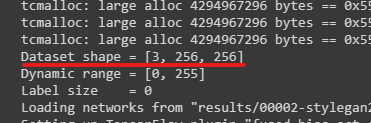

In [8]:
dataset_name = "art" #@param[]{allow-input: true}

!python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-f --dataset={dataset_name} --mirror-augment=true --metrics=None

Local submit - run_dir: results/00002-stylegan2-art-1gpu-config-f
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
tcmalloc: large alloc 4294967296 bytes == 0x559db9032000 @  0x7f12f916c001 0x7f12f5c5054f 0x7f12f5ca0b58 0x7f12f5ca4b17 0x7f12f5d43203 0x559db2331544 0x559db2331240 0x559db23a5627 0x559db239fced 0x559db233348c 0x559db2374159 0x559db23710a4 0x559db2333698 0x559db23a1fe4 0x559db239f9ee 0x559db2271e2b 0x559db23a1fe4 0x559db239f9ee 0x559db2271e2b 0x559db23a1fe4 0x559db2332afa 0x559db23a0915 0x559db2332afa 0x559db23a0c0d 0x559db239f9ee 0x559db2271e2b 0x559db23a1fe4 0x559db239f9ee 0x559db2271e2b 0x559db23a1fe4 0x559db2332afa
tcmalloc: large alloc 4294967296 bytes == 0x559eb9032000 @  0x7f12f916a1e7 0x7f12f5c5046e 0x7f12f5ca0c7b 0x7f12f5ca135f 0x7f12f5d43103 0x559db2331544 0x559db2331240 0x559db23a5627 0x559db239f9ee 0x559db2332bda 0x559db23a1737 0x559db239f9ee 0x559db2332bda 0x559db23a1737 0x559db239f

## Training From Scratch

In [ ]:
dataset_name = "kindly_no_spaces" #@param[]{allow-input: true}
!python run_training.py --num-gpus=1 --data-dir=./datasets --result-dir=./results_scratched --config=config-f --dataset={dataset_name} --mirror-augment=true --metrics=None

Couldn't find valid snapshot, starting over
Local submit - run_dir: results_scratched/00001-stylegan2-ffhq-1gpu-config-f
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
tcmalloc: large alloc 4294967296 bytes == 0x55bab77a0000 @  0x7f95407c3001 0x7f953d2a754f 0x7f953d2f7b58 0x7f953d2fbb17 0x7f953d39a203 0x55baafee1544 0x55baafee1240 0x55baaff55627 0x55baaff4fced 0x55baafee348c 0x55baaff24159 0x55baaff210a4 0x55baafee3698 0x55baaff51fe4 0x55baaff4f9ee 0x55baafe21e2b 0x55baaff51fe4 0x55baaff4f9ee 0x55baafe21e2b 0x55baaff51fe4 0x55baafee2afa 0x55baaff50915 0x55baafee2afa 0x55baaff50c0d 0x55baaff4f9ee 0x55baafe21e2b 0x55baaff51fe4 0x55baaff4f9ee 0x55baafe21e2b 0x55baaff51fe4 0x55baafee2afa
tcmalloc: large alloc 4294967296 bytes == 0x55bbb77a0000 @  0x7f95407c11e7 0x7f953d2a746e 0x7f953d2f7c7b 0x7f953d2f835f 0x7f953d39a103 0x55baafee1544 0x55baafee1240 0x55baaff55627 0x55baaff4f9ee 0x55baafee2bda 0x55baaff51737 0

- Once 25000 kimg have been trained it means that the training is complete.
- Check results after 2-3 days regardless from later files to know what results are the best and pick that network snapshot for testing/generation. 
- Your google drive must have ample space mind you for higher level training I'd say 40-50GB atleast.
- Sometimes image generation is far better than the fakes generated.
- Do continous testing with the network snapshots as the training will resume from the point where you left off.

Once running, your training files will show up in the results folder.
To see the results after the training. Head to the results folder and select the last folder in it to see latest fakes files. You can judge the latest training progress from it. Example is:
- fakes010000.jpg
- fakes010001.jpg (Latest)

![image](https://media.giphy.com/media/SR4q9G6aCiGd46w8JQ/source.gif?cid=790b7611089e35549aefe254751d8054219fab8027ea99af&rid=source.gif&ct=g)

## Note 2
First 10 hours of the StyleGAN2 training from scratch model might not be able to see some results or they might just be random pixels values of different pixels. Do not worry this is how it goes actually. You will be able to see results after putting in loads of hours of training on your model.

#Testing the model (generating images)
The following command will generate 55 sample images from the model.

##Options
`--network`

Make sure the `--network` argument points to your .pkl file. (My preferred method is to right click on the file in the Files pane to your left and choose `Copy Path`, then paste that into the argument after the `=` sign).

`--seeds`

This allows you to choose random seeds from the model. Remember that our input to StyleGAN is a 512-dimensional array. These seeds will generate those 512 values. Each seed will generate a different, random array. The same seed value will also always generate the same random array, so we can later use it for other purposes like interpolation.

`--truncation-psi`

Truncation is a special argument of StyleGAN. Essentially values that are closer to 0 will be more real than numbers further away from 0. I generally recommend a value between `0.5` and `1.0`. `0.5` will give you pretty "realistic" results, while `1.0` is likely to give you "weirder" results.

In [ ]:
!pip install opensimplex

In [ ]:
!python run_generator.py generate-images --network=/path_to_desired_ network-snapshot-010000.pkl --seeds=3875451-3876000 --truncation-psi=0.5

Local submit - run_dir: results/00003-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "//content/drive/MyDrive/stylegan2-colab/stylegan2/results/00002-stylegan2-ffhq-1gpu-config-f/network-snapshot-010000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating image for seed 3875451 (1/550) ...
Generating image for seed 3875452 (2/550) ...
Generating image for seed 3875453 (3/550) ...
Generating image for seed 3875454 (4/550) ...
Generating image for seed 3875455 (5/550) ...
Generating image for seed 3875456 (6/550) ...
Generating image for seed 3875457 (7/550) ...
Generating image for seed 3875458 (8/550) ...
Generating image for seed 3875459 (9/550) ...
Generating image for seed 3875460 (10/550) ...
Generating image for seed 3875461 (11/550) ...
Generating image for seed 3875462 (12/550) ...
Generating imag

Let’s zip the generated files and download them.

In [ ]:
!zip -r /content/drive/My\ Drive/generated-0.5.zip /path_to_generated_images_in_results_directory

  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/ (stored 0%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/submit_config.pkl (deflated 43%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/submit_config.txt (deflated 55%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/log.txt (deflated 88%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/seed3875451.png (deflated 0%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/seed3875452.png (deflated 0%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/seed3875453.png (deflated 0%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-generate-images/seed3875454.png (deflated 0%)
  adding: content/drive/MyDrive/stylegan2-colab/stylegan2/results/00003-ge

## Interpolation For Latent Walk


In [ ]:
!python run_generator.py generate-latent-walk --network=/content/drive/MyDrive/stylegan2-colab/stylegan2/results/00002-stylegan2-ffhq-1gpu-config-f/network-snapshot-010000.pkl --seeds=3,11,17,25,3 --frames 200 --truncation-psi=0.5

Local submit - run_dir: results/00004-generate-latent-walk
dnnlib: Running run_generator.generate_latent_walk() on localhost...
Loading networks from "/content/drive/MyDrive/stylegan2-colab/stylegan2/results/00002-stylegan2-ffhq-1gpu-config-f/network-snapshot-010000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
not enough values to generate walk
Generating image for step 0/204 ...
Generating image for step 1/204 ...
Generating image for step 2/204 ...
Generating image for step 3/204 ...
Generating image for step 4/204 ...
Generating image for step 5/204 ...
Generating image for step 6/204 ...
Generating image for step 7/204 ...
Generating image for step 8/204 ...
Generating image for step 9/204 ...
Generating image for step 10/204 ...
Generating image for step 11/204 ...
Generating image for step 12/204 ...
Generating image for step 13/204 ...
Generating image f

- If you do have a problem in running the code. I can surely help you out with anything that is related to it.
- I have optimized and chosen the best possible repository to minimize possible errors in the code.

# Thank You